# Just operation policies of Guadalajara’s Aquapheric under drought conditions

## 2. Optimization Formulations

This notebook is designed to find the optimization formulations that can ensure that the optimal policies for the diversity of justice principle combinations can be found by filtering the pareto set. In other words, what a priori formulation can ensure an adecuate a posteriori implementation of the Distributive Justice 


In [61]:


from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Scenario, Constraint,optimize)

import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [62]:
from AMG_function import AMG_model_function
from functions_data import full_dataframe
from AMG_drought_indicator import get_drought_state


outcomes = AMG_model_function(chapala_flow= 7.1, calderon_lared_flow= 0, pozos_flow= 2.2, toluquilla_flow= 0.4, 
                aqp1_PP2_to_PP3=205, aqp2_PP3_to_Pozos=-664, aqp3_Pozos_to_Toluquilla=-613, aqp4_Toluquilla_to_PP1=-639)
print(outcomes)


{'delivered_PP1': 5.751, 'delivered_PP2': 1.349, 'delivered_PP3': 0, 'delivered_Pozos': 2.2, 'delivered_Toluquilla': 0.4, 'demand_PP1': 2.933, 'demand_PP2': 0.757, 'demand_PP3': 0.944, 'demand_Toluquilla': 0.782, 'demand_Pozos': 1.201, 'supplied_PP1': 2.64395196, 'supplied_PP2': 0.6822205, 'supplied_PP3': 0.8508500000000001, 'supplied_Toluquilla': 0.7044775400000001, 'supplied_Pozos': 1.0822500000000002, 'total_supplied': 5.96375, 'supplied_demand_PP1': 0.901, 'supplied_demand_PP2': 0.901, 'supplied_demand_PP3': 0.901, 'supplied_demand_Toluquilla': 0.901, 'supplied_demand_Pozos': 0.901, 'supplied_demand_deficit_PP1': 0.09899999999999998, 'supplied_demand_deficit_PP2': 0.09899999999999998, 'supplied_demand_deficit_PP3': 0.09899999999999998, 'supplied_demand_deficit_Toluquilla': 0.09899999999999998, 'supplied_demand_deficit_Pozos': 0.09899999999999998, 'supply_percapita_PP1': 144.0, 'supply_percapita_PP2': 132.0, 'supply_percapita_PP3': 141.0, 'supply_percapita_Toluquilla': 133.0, 'suppl

### Confirming that these scenarios actually represent Los, Mid and High Droughts using the Drought Indicator function

# 1. Ad-Hoc Convergence using HiperVolume

In [63]:
flows = ["chapala_flow", "calderon_lared_flow", "pozos_flow", "toluquilla_flow"]
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv",index_col=0)
representative_scenarios_df.head()

,chapala_flow,calderon_lared_flow,pozos_flow,toluquilla_flow,name
HIGH,2.3,0.333,0.767,0.167,rep_scen_HIGH
MID,4.6,0.666,1.534,0.334,rep_scen_MID
LOW,6.9,0.999,2.301,0.501,rep_scen_LOW


In [64]:
representative_scenarios_df

,chapala_flow,calderon_lared_flow,pozos_flow,toluquilla_flow,name
HIGH,2.3,0.333,0.767,0.167,rep_scen_HIGH
MID,4.6,0.666,1.534,0.334,rep_scen_MID
LOW,6.9,0.999,2.301,0.501,rep_scen_LOW


In [65]:
representative_scenarios_df.loc["HIGH",:]

chapala_flow                     2.3
calderon_lared_flow            0.333
pozos_flow                     0.767
toluquilla_flow                0.167
name                   rep_scen_HIGH
Name: HIGH, dtype: object

In [66]:
#Problem formulation
performance_outcomes = {"supplied_demand_deficit":True,
                          "supplied_demand":False,
                          "supply_percapita":False}

justice_outcomes = {"supplied_demand_GINI":True,
                      "supply_percapita_GINI":False,
                      "average_supply_percapita":False,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}

other_outcomes = {"energy_costs":True}



#Model Parameters
n_nfe = 10000
epsilon = 0.1
seed = 1

#Scenario setting
flows = ["chapala_flow", "calderon_lared_flow", "pozos_flow", "toluquilla_flow"]
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)
scenario = representative_scenarios_df.loc["HIGH",flows+["name"]].to_dict()


all_outcomes = {**performance_outcomes, **justice_outcomes, **other_outcomes}
current_formulation = [outcome for outcome, active in all_outcomes.items() if active]

experiment_name = "-".join(current_formulation)+f" {scenario['name']}-{n_nfe}-{epsilon}-{seed}"
print(experiment_name)

supplied_demand_deficit-supplied_demand_GINI-energy_costs rep_scen_HIGH-10000-0.1-1


In [67]:
from AMG_optimization import run_optimization
from ema_workbench import HypervolumeMetric
from ema_workbench.em_framework.optimization import to_problem

results, run_time  = run_optimization(experiment_name=experiment_name,
                 model_function=AMG_model_function, 
                 outcomes= all_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario,
                 restriction = True)
print(all_outcomes)
results.head()

[MainProcess/INFO] pool started with 8 workers
12873it [03:06, 69.16it/s]                                                     
[MainProcess/INFO] optimization completed, found 971 solutions
[MainProcess/INFO] terminating pool


{'supplied_demand_deficit': True, 'supplied_demand': False, 'supply_percapita': False, 'supplied_demand_GINI': True, 'supply_percapita_GINI': False, 'average_supply_percapita': False, 'ZAs_below_142': False, 'ZAs_below_128': False, 'ZAs_below_100': False, 'ZAs_below_50': False, 'energy_costs': True}


,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,aqp4_Toluquilla_to_PP1,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,supplied_demand_GINI,energy_costs,experiment_name
0,334,-223,-193,-571,0.789,0.938,0.298,0.371,0.692,0.355230,0.33025,supplied_demand_deficit-supplied_demand_GINI-e...
1,-652,-655,-486,-536,0.781,0.091,0.679,0.644,0.768,0.295336,0.58225,supplied_demand_deficit-supplied_demand_GINI-e...
2,-254,167,-433,-591,0.793,0.433,0.971,0.554,0.351,0.337197,0.36125,supplied_demand_deficit-supplied_demand_GINI-e...
3,-297,-138,-185,-615,0.798,0.396,0.791,0.328,0.651,0.262279,0.30875,supplied_demand_deficit-supplied_demand_GINI-e...
4,-644,-417,-64,-101,0.684,0.098,0.837,0.655,0.867,0.370091,0.30650,supplied_demand_deficit-supplied_demand_GINI-e...


In [68]:
import numpy as np
import pandas as pd
from platypus import EpsNSGAII, ProcessPoolEvaluator
from functions_data import full_dataframe, find_compromise
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Scenario, Constraint, optimize, IntegerParameter)

from ema_workbench.em_framework.optimization import (ArchiveLogger, EpsilonProgress)

from AMG_function import AMG_model_function
import random
import time
import logging

experiment_name=experiment_name
model_function=AMG_model_function

n_nfe = n_nfe
epsilon = epsilon
seed = seed
scenario=scenario
restriction = True
rounding_levers = 3

scenario = Scenario(**scenario)



#Setting the stage
ema_logging.log_to_stderr(ema_logging.INFO)

ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

#instantiate the model
AMG_model = Model("AMGmodel", function = model_function)


#LEVERS
#Define a resolution to round levers and avoid finding solutions with unecesary precision considering uncertainties
scale = 10**rounding_levers

#Currently water can't flow between pozos and Toluquilla due to heigh difference. We call this the restriction.
if restriction == True: 
    pozos_to_toluquilla = 0 
    #resolution_pozos_to_toluquilla = np.round(np.linspace(-1, 0, 10**rounding_levers, rounding_levers)).tolist()
else: 
    pozos_to_toluquilla = 1
    #resolution_pozos_to_toluquilla = resolution


AMG_model.levers = [IntegerParameter('aqp1_PP2_to_PP3', -1*scale, 1*scale),
                    IntegerParameter('aqp2_PP3_to_Pozos', -1*scale, 1*scale),
                    IntegerParameter('aqp3_Pozos_to_Toluquilla', -1*scale, pozos_to_toluquilla*scale),
                    IntegerParameter('aqp4_Toluquilla_to_PP1', -1*scale, 1*scale)]

#OUTCOMES
maximizing_outcomes = [*[f'supplied_demand_{ZA}' for ZA in ZA_names if "supplied_demand" in current_formulation],
                    *[f'supply_percapita_{ZA}' for ZA in ZA_names if "supply_percapita" in current_formulation],
                    *[ outcome for outcome in ["average_supply_percapita"] if outcome in current_formulation]]

minimizing_outcomes = [*[f'supplied_demand_deficit_{ZA}' for ZA in ZA_names if "supplied_demand_deficit" in current_formulation],
                    *[ outcome for outcome in ['supplied_demand_GINI', 'supply_percapita_GINI', 'energy_costs', "ZAs_below_142", "ZAs_below_128","ZAs_below_100","ZAs_below_50"] if outcome in current_formulation]]

info_outcomes = [*[f"supplied_{ZA}" for ZA in ZA_names]]

AMG_model.outcomes = [ScalarOutcome(scalar_outcome, kind=ScalarOutcome.MAXIMIZE) for scalar_outcome in maximizing_outcomes] + [
    ScalarOutcome(minimizing_outcome, kind=ScalarOutcome.MINIMIZE) for minimizing_outcome in minimizing_outcomes] + [
    ScalarOutcome(info_outcome, kind=ScalarOutcome.INFO) for info_outcome in info_outcomes]


#Optimization
logging.info(f"Starting optimization for {experiment_name} with n_nfe={n_nfe}")
ema_logging.log_to_stderr(ema_logging.INFO)

#calculate outcomes but substracting the info outcomes for the epsilons in the optimizaiton
n_outcomes = len(AMG_model.outcomes)-len(info_outcomes)

#Constrain
non_negative_outcomes = [f"supplied_{ZA}" for ZA in ZA_names]
constraints = [Constraint("non_negative_constrain", outcome_names= outcome, 
                        function=lambda x: max(0, -x)) for outcome in non_negative_outcomes]

random.seed(seed)
np.random.seed(seed)

#start a timer
start_time = time.time()

# Define decision variable and outcome names
decision_varnames = [lever.name for lever in AMG_model.levers]
outcome_varnames = [outcome.name for outcome in AMG_model.outcomes]

convergence_metrics = [
    ArchiveLogger(
        "./archives",
        [l.name for l in AMG_model.levers],
        [o.name for o in AMG_model.outcomes],
        base_filename="logger.tar.gz",
    ),
    EpsilonProgress(),
]


with MultiprocessingEvaluator(AMG_model) as evaluator:
    results, convergence = evaluator.optimize(
        nfe=n_nfe, searchover="levers", epsilons=[epsilon] * n_outcomes, constraints=constraints, reference=scenario,
        convergence= convergence_metrics
    )

# End timing
end_time = time.time()

# Compute the duration
duration = round(end_time - start_time,0)
results["experiment_name"] = experiment_name

logging.info(f"Completed optimization for {experiment_name} in {duration} seconds")

[MainProcess/INFO] pool started with 8 workers
12873it [03:19, 64.37it/s]                                                     
[MainProcess/INFO] optimization completed, found 971 solutions
[MainProcess/INFO] terminating pool


In [69]:
all_outcomes

{'supplied_demand_deficit': True,
 'supplied_demand': False,
 'supply_percapita': False,
 'supplied_demand_GINI': True,
 'supply_percapita_GINI': False,
 'average_supply_percapita': False,
 'ZAs_below_142': False,
 'ZAs_below_128': False,
 'ZAs_below_100': False,
 'ZAs_below_50': False,
 'energy_costs': True}

In [70]:
archives = ArchiveLogger.load_archives("archives\logger.tar.gz")
reference_set = results.drop(columns=["experiment_name"])
cols = reference_set.columns
for key in archives.keys():
    archives[key] = archives[key][cols]



In [71]:
reference_set

,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,aqp4_Toluquilla_to_PP1,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,supplied_demand_GINI,energy_costs
0,334,-223,-193,-571,0.789,0.938,0.298,0.371,0.692,0.355230,0.33025
1,-652,-655,-486,-536,0.781,0.091,0.679,0.644,0.768,0.295336,0.58225
2,-254,167,-433,-591,0.793,0.433,0.971,0.554,0.351,0.337197,0.36125
3,-297,-138,-185,-615,0.798,0.396,0.791,0.328,0.651,0.262279,0.30875
4,-644,-417,-64,-101,0.684,0.098,0.837,0.655,0.867,0.370091,0.30650
...,...,...,...,...,...,...,...,...,...,...,...
966,-310,-615,-257,-329,0.735,0.385,0.471,0.625,0.870,0.257889,0.37775
967,-312,-16,-17,-165,0.699,0.383,0.885,0.562,0.676,0.254262,0.12750
968,-469,-487,-201,-108,0.686,0.248,0.669,0.763,0.831,0.279534,0.31625
969,275,-350,-158,3,0.661,0.887,0.251,0.819,0.780,0.357054,0.19650


In [72]:
from ema_workbench import HypervolumeMetric
from ema_workbench.em_framework.optimization import to_problem

problem = to_problem(AMG_model, searchover="levers")

hv = HypervolumeMetric(reference_set, problem)

hypervolume = [(nfe, hv.calculate(archive)) for nfe, archive in archives.items()]
hypervolume.sort(key=lambda x:x[0])
hypervolume = np.asarray(hypervolume)

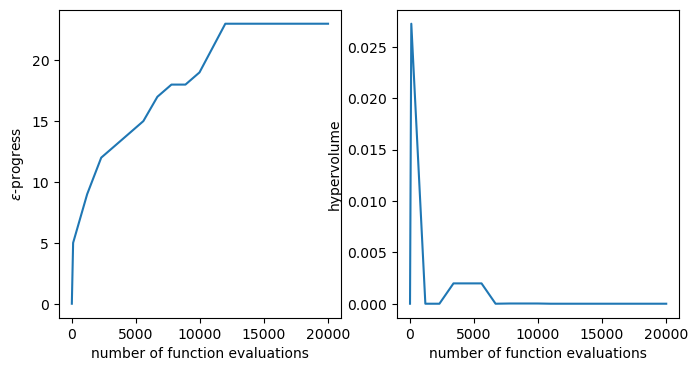

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(hypervolume[:, 0], hypervolume[:, 1])
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [ ]:
# Load the convergence data
convergence_data = pd.read_csv(f"{experiment_name}_convergence.csv")

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(convergence_data['nfe'], convergence_data['epsilon_progress'])
plt.xlabel('Number of Function Evaluations (nfe)')
plt.ylabel('Epsilon Progress')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'supplied_demand_deficit-supplied_demand_GINI-energy_costs rep_scen_HIGH-20000-0.6-1_convergence.csv'

## 3. Run Optimizations with Different Formulations

In [ ]:
formulations = pd.read_excel("2_formulation\optimization_parameters.xlsx", index_col="experiment_name")
formulations.head(50)

,supplied_demand_deficit,supplied_demand,supply_percapita,supplied_demand_GINI,supply_percapita_GINI,average_supply_percapita,ZAs_below_142,ZAs_below_128,ZAs_below_100,ZAs_below_50,...,epsilon,seed,scenario_name,scenario_chapala_flow,scenario_calderon_lared_flow,scenario_pozos_flow,scenario_toluquilla_flow,restriction,model_function,Rationale
experiment_name,,,,,,,,,,,,,,,,,,,,,
Supplied Demand Deficit,True,False,False,False,False,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
Average Sup. PerCap,False,False,False,False,False,True,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",True,False,False,False,True,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
"Sup. Dem. Deficit, Energy, Sup. PerCap. GINI & Sufficientarians",True,False,False,False,True,False,True,False,True,True,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
Sup. Dem. Deficit & All Justice,True,False,False,True,True,True,True,False,True,True,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN


In [ ]:
outcomes_vars =["supplied_demand_deficit","supplied_demand","supply_percapita",
        "supplied_demand_GINI","supply_percapita_GINI","average_supply_percapita",
        "ZAs_below_142","ZAs_below_128","ZAs_below_100","ZAs_below_50",
        "energy_costs"]

aqp_flows = ["aqp1_PP2_to_PP3", "aqp2_PP3_to_Pozos", "aqp3_Pozos_to_Toluquilla", "aqp4_Toluquilla_to_PP1"]

# Model Parameters
n_nfe = 100000
epsilon = 0.2
seed = 1

# Define scenario from the representative scenarios df
scenario = representative_scenarios_df.loc["HIGH",flows].to_dict()

# Empty df to concat all results from the optimizations 
optimization_results = pd.DataFrame()

for experiment_name, formulation in formulations.iterrows():
    print(formulation[outcomes_vars].to_dict())
    results, duration = run_optimization(experiment_name=experiment_name, 
                                         outcomes = formulation[outcomes_vars].to_dict(),
                                         scenario=scenario,
                                         
                                         n_nfe = n_nfe,
                                         seed=seed)
    

    # Remove outcomes
    results = results.loc[:,aqp_flows+["experiment_name"]]
    
    optimization_results = pd.concat([results,optimization_results])

# Change index from individual optimization runs and use it to define policies
optimization_results = optimization_results.reset_index()
optimization_results = optimization_results.rename(columns={"index":"policy"})

optimization_results.to_csv("results/optimization_results.csv",index=False)

optimization_results.head()


{'supplied_demand_deficit': True, 'supplied_demand': False, 'supply_percapita': False, 'supplied_demand_GINI': False, 'supply_percapita_GINI': False, 'average_supply_percapita': False, 'ZAs_below_142': False, 'ZAs_below_128': False, 'ZAs_below_100': False, 'ZAs_below_50': False, 'energy_costs': False}


[MainProcess/INFO] pool started with 8 workers
100%|████████████████████████████████████████| 500/500 [00:07<00:00, 69.50it/s]
[MainProcess/INFO] optimization completed, found 155 solutions
[MainProcess/INFO] terminating pool


{'supplied_demand_deficit': False, 'supplied_demand': False, 'supply_percapita': False, 'supplied_demand_GINI': False, 'supply_percapita_GINI': False, 'average_supply_percapita': True, 'ZAs_below_142': False, 'ZAs_below_128': False, 'ZAs_below_100': False, 'ZAs_below_50': False, 'energy_costs': False}


[MainProcess/INFO] pool started with 8 workers
597it [00:06, 87.17it/s]                                                       
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool


{'supplied_demand_deficit': True, 'supplied_demand': False, 'supply_percapita': False, 'supplied_demand_GINI': False, 'supply_percapita_GINI': True, 'average_supply_percapita': False, 'ZAs_below_142': False, 'ZAs_below_128': False, 'ZAs_below_100': False, 'ZAs_below_50': False, 'energy_costs': True}


[MainProcess/INFO] pool started with 8 workers
599it [00:06, 87.03it/s]                                                       
[MainProcess/INFO] optimization completed, found 177 solutions
[MainProcess/INFO] terminating pool


{'supplied_demand_deficit': True, 'supplied_demand': False, 'supply_percapita': False, 'supplied_demand_GINI': False, 'supply_percapita_GINI': True, 'average_supply_percapita': False, 'ZAs_below_142': True, 'ZAs_below_128': False, 'ZAs_below_100': True, 'ZAs_below_50': True, 'energy_costs': True}


[MainProcess/INFO] pool started with 8 workers
596it [00:07, 75.16it/s]                                                       
[MainProcess/INFO] optimization completed, found 185 solutions
[MainProcess/INFO] terminating pool


{'supplied_demand_deficit': True, 'supplied_demand': False, 'supply_percapita': False, 'supplied_demand_GINI': True, 'supply_percapita_GINI': True, 'average_supply_percapita': True, 'ZAs_below_142': True, 'ZAs_below_128': False, 'ZAs_below_100': True, 'ZAs_below_50': True, 'energy_costs': True}


[MainProcess/INFO] pool started with 8 workers
100%|████████████████████████████████████████| 500/500 [00:07<00:00, 62.67it/s]
[MainProcess/INFO] optimization completed, found 150 solutions
[MainProcess/INFO] terminating pool


,policy,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,aqp4_Toluquilla_to_PP1,experiment_name
0,0,334,-223,-193,-571,Sup. Dem. Deficit & All Justice
1,1,-195,206,-127,-930,Sup. Dem. Deficit & All Justice
2,2,-173,-152,-320,-646,Sup. Dem. Deficit & All Justice
3,3,-652,-655,-486,-536,Sup. Dem. Deficit & All Justice
4,4,-254,167,-433,-591,Sup. Dem. Deficit & All Justice
5,5,-622,-295,-703,-858,Sup. Dem. Deficit & All Justice
6,6,-297,-138,-185,-615,Sup. Dem. Deficit & All Justice
7,7,291,633,-289,57,Sup. Dem. Deficit & All Justice
8,8,156,-484,-867,-983,Sup. Dem. Deficit & All Justice
9,9,311,-403,-477,-989,Sup. Dem. Deficit & All Justice


In [ ]:
full_optimization_results_df = full_dataframe(optimization_results, scenario=scenario)

full_optimization_results_df.head()


,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,demand_PP1,...,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,ZAs_below_128,scenario,experiment_name
0,-571,334,-223,-193,1.863,0.437,0.333,0.767,0.167,2.933,...,0.358763,0.355230,51.0,0.33025,5.0,4.0,3.0,5.0,unspecified,Sup. Dem. Deficit & All Justice
1,-930,-195,206,-127,1.863,0.437,0.333,0.767,0.167,2.933,...,0.409907,0.415618,51.0,0.36450,4.0,4.0,2.0,4.0,unspecified,Sup. Dem. Deficit & All Justice
2,-646,-173,-152,-320,1.863,0.437,0.333,0.767,0.167,2.933,...,0.180602,0.195395,50.0,0.32275,5.0,5.0,2.0,5.0,unspecified,Sup. Dem. Deficit & All Justice
3,-536,-652,-655,-486,1.863,0.437,0.333,0.767,0.167,2.933,...,0.283279,0.295336,50.0,0.58225,5.0,4.0,2.0,4.0,unspecified,Sup. Dem. Deficit & All Justice
4,-591,-254,167,-433,1.863,0.437,0.333,0.767,0.167,2.933,...,0.326241,0.337197,50.0,0.36125,5.0,5.0,2.0,5.0,unspecified,Sup. Dem. Deficit & All Justice


In [ ]:
from functions_data import find_minmax_values

# Finds the maximum or minimum value for each objective for each formulation
min_max_df = find_minmax_values(full_optimization_results_df)

min_max_df.head()



,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,supplied_demand_GINI,supply_percapita_GINI,ZAs_below_142,ZAs_below_100,ZAs_below_50,energy_costs,supplied_demand_PP1,supplied_demand_PP2,supplied_demand_PP3,supplied_demand_Toluquilla,supplied_demand_Pozos,comp_energy_costs,comp_supplied_demand_GINI
formulation,,,,,,,,,,,,,,,,,,
Average Sup. PerCap,0.789,0.938,0.298,0.371,0.692,0.355230,0.358763,5.0,4.0,3.0,0.33025,0.211,0.062,0.702,0.629,0.308,0.33025,0.355230
Sup. Dem. Deficit & All Justice,0.649,0.015,0.018,0.010,0.021,0.116744,0.101931,3.0,3.0,1.0,0.08175,0.351,1.202,1.220,1.048,1.104,0.08175,0.116744
"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",0.647,0.014,0.018,0.004,0.054,0.146394,0.147518,3.0,3.0,1.0,0.12175,0.353,1.190,1.100,1.025,1.082,0.32275,0.195395
"Sup. Dem. Deficit, Energy, Sup. PerCap. GINI & Sufficientarians",0.649,0.007,0.010,0.004,0.001,0.095847,0.087943,4.0,2.0,1.0,0.10400,0.351,1.172,1.141,1.110,1.032,0.87550,0.408293
Supplied Demand Deficit,0.643,0.004,0.001,0.001,0.011,0.146801,0.130855,3.0,3.0,1.0,0.13150,0.357,1.172,1.216,1.043,0.989,0.87550,0.408293


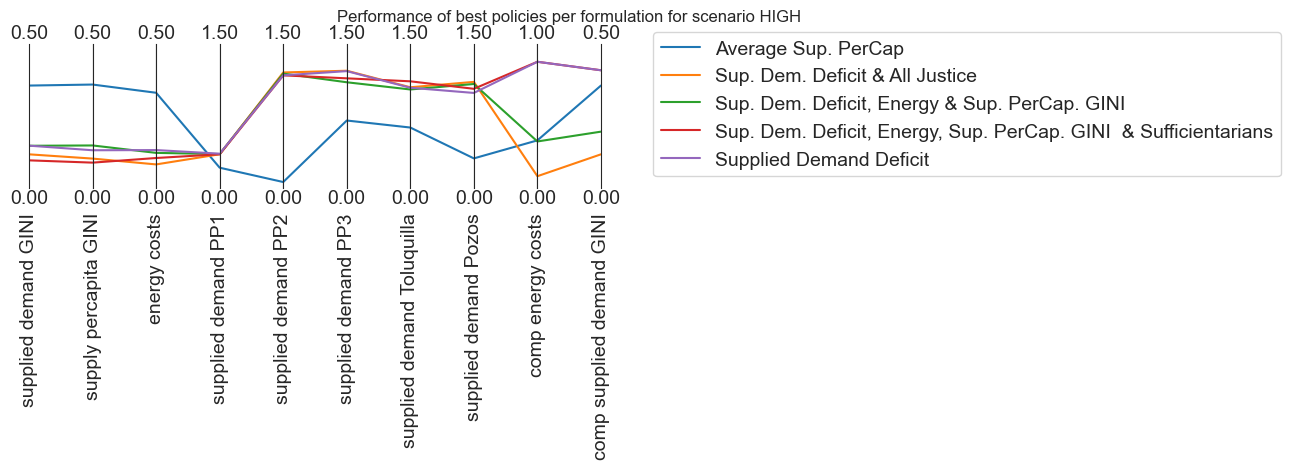

In [ ]:
from ema_workbench.analysis import parcoords

# Load your data and limits (replace with your actual data and limits)
colors = sns.color_palette()
data = min_max_df
limits = pd.read_csv("2_formulation/limits.csv")

# Replace underscores with spaces in column names
limits.columns = limits.columns.str.replace('_', ' ')

# Create parallel axes plot
paraxes = parcoords.ParallelAxes(limits)

# Plot each row of data
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])

# Customize the plot
plt.title(f'Performance of best policies per formulation for scenario HIGH')
paraxes.legend()

# Adjust tick labels
for ax in paraxes.axes:
    # Remove the unnecessary decimal places
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
    # Add percentage symbol to tick labels (excluding GINI columns)
    if 'GINI' not in ax.get_ylabel():
        ax.set_yticklabels([f'{int(tick * 100)}%' for tick in ax.get_yticks()])

# Save the figure
plt.savefig("2_formulation/min_max_comp_HIGH.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
from functions_data import find_compromise, add_objective_columns

objectives_min = ['supplied_demand_deficit_PP1',
       'supplied_demand_deficit_PP2', 'supplied_demand_deficit_PP3',
       'supplied_demand_deficit_Toluquilla', 'supplied_demand_deficit_Pozos',
       "supplied_demand_GINI","supply_percapita_GINI",
       'ZAs_below_142','ZAs_below_100', 'ZAs_below_50',
       "energy_costs"]

objectives_max = ['supplied_demand_PP1', 'supplied_demand_PP2', 'supplied_demand_PP3',
       'supplied_demand_Toluquilla', 'supplied_demand_Pozos']

compromise_objectives = ["energy_costs","supplied_demand_GINI"]

full_df_with_objectives = add_objective_columns(full_optimization_results_df, objectives_min, objectives_max, compromise_objectives)

full_df_with_objectives.to_csv("results/filtering_test.csv",index=False)
full_df_with_objectives.tail()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,demand_PP1,...,ZAs_below_100_min,ZAs_below_50_min,energy_costs_min,supplied_demand_PP1_max,supplied_demand_PP2_max,supplied_demand_PP3_max,supplied_demand_Toluquilla_max,supplied_demand_Pozos_max,energy_costs_compromise,supplied_demand_GINI_compromise
663,-736,-308,-163,-527,1.863,0.437,0.333,0.767,0.167,2.933,...,True,True,True,True,True,True,True,True,False,False
664,-966,261,411,-376,1.863,0.437,0.333,0.767,0.167,2.933,...,True,True,True,True,True,True,True,True,False,False
665,-536,-325,-77,-427,1.863,0.437,0.333,0.767,0.167,2.933,...,True,True,True,True,True,True,True,True,False,False
666,-983,-132,-493,-107,1.863,0.437,0.333,0.767,0.167,2.933,...,True,True,True,True,True,True,True,True,False,False
667,-519,-348,-112,-751,1.863,0.437,0.333,0.767,0.167,2.933,...,True,True,True,True,True,True,True,True,False,False


In [ ]:
full_optimization_results_df

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,demand_PP1,...,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,ZAs_below_128,scenario,experiment_name
0,-571,334,-223,-193,1.863,0.437,0.333,0.767,0.167,2.933,...,0.358763,0.355230,51.0,0.33025,5.0,4.0,3.0,5.0,unspecified,Sup. Dem. Deficit & All Justice
1,-930,-195,206,-127,1.863,0.437,0.333,0.767,0.167,2.933,...,0.409907,0.415618,51.0,0.36450,4.0,4.0,2.0,4.0,unspecified,Sup. Dem. Deficit & All Justice
2,-646,-173,-152,-320,1.863,0.437,0.333,0.767,0.167,2.933,...,0.180602,0.195395,50.0,0.32275,5.0,5.0,2.0,5.0,unspecified,Sup. Dem. Deficit & All Justice
3,-536,-652,-655,-486,1.863,0.437,0.333,0.767,0.167,2.933,...,0.283279,0.295336,50.0,0.58225,5.0,4.0,2.0,4.0,unspecified,Sup. Dem. Deficit & All Justice
4,-591,-254,167,-433,1.863,0.437,0.333,0.767,0.167,2.933,...,0.326241,0.337197,50.0,0.36125,5.0,5.0,2.0,5.0,unspecified,Sup. Dem. Deficit & All Justice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,-736,-308,-163,-527,1.863,0.437,0.333,0.767,0.167,2.933,...,0.221333,0.233730,50.0,0.43350,5.0,5.0,2.0,5.0,unspecified,Supplied Demand Deficit
664,-966,261,411,-376,1.863,0.437,0.333,0.767,0.167,2.933,...,0.388040,0.393465,51.0,0.50350,5.0,3.0,3.0,5.0,unspecified,Supplied Demand Deficit
665,-536,-325,-77,-427,1.863,0.437,0.333,0.767,0.167,2.933,...,0.249825,0.262206,50.0,0.34125,5.0,5.0,2.0,5.0,unspecified,Supplied Demand Deficit
666,-983,-132,-493,-107,1.863,0.437,0.333,0.767,0.167,2.933,...,0.396542,0.399306,50.0,0.42875,4.0,4.0,2.0,4.0,unspecified,Supplied Demand Deficit


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

# Select columns for the DataFrame
dataframe = full_optimization_results_df[[f"supplied_demand_{ZA}" for ZA in ZA_names] + ["supplied_demand_GINI", "experiment_name"]]

# Create a DataFrame with the necessary columns
viz_data = dataframe.rename(columns=lambda x: x.split('_')[-1])

# Melt the DataFrame to long format for plotting
viz_data_melted = viz_data.melt(id_vars=['experiment_name'], var_name='Outcome')

# Create the clustered box plot with customized parameters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='value', hue='experiment_name', data=viz_data_melted, palette='Set2')
plt.title('Clustered Box Plot of Outcomes for {}'.format("title"))
plt.tight_layout()

# Show the plot
plt.savefig("experiment_results/experiments_boxplot.png")
plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['experiment_name']"

In [ ]:
from functions_viz import violin_plot

results_plot = full_df[[f"supplied_demand_{ZA}" for ZA in ZA_names]+["supplied_demand_GINI"]]
violin_plot(results_plot,experiment_name, y_axis="Supplied demand")

ModuleNotFoundError: No module named 'viz_functions'

from viz_functions import parallel_axis_plot

parallel_axis_plot(results_plot)

In [ ]:
experiment_results = full_df


experiment_results.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Toluquilla,delivered_Pozos,supplied_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment
0,-0.431440,0.163298,-0.597881,-0.078320,5.751,1.349,0.0,0.4,2.2,2.778866,...,137.4,0.648,0.104221,0.103266,138.0,0.317735,3.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
1,-0.381440,0.811276,-0.308070,-0.371393,5.751,1.349,0.0,0.4,2.2,2.811366,...,130.0,0.381,0.152000,0.137022,138.0,0.468045,3.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
2,-0.617442,0.475436,-0.428132,-0.362303,5.751,1.349,0.0,0.4,2.2,2.657965,...,136.0,0.669,0.082353,0.078145,138.0,0.470828,2.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
3,-0.350342,0.471640,-0.460169,-0.143333,5.751,1.349,0.0,0.4,2.2,2.831580,...,133.6,0.672,0.093413,0.088018,138.0,0.356371,2.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
4,-0.328725,0.488656,-0.565736,-0.067127,5.751,1.349,0.0,0.4,2.2,2.845631,...,134.2,0.658,0.116841,0.113120,138.0,0.362561,2.0,2.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...


In [ ]:
experiment_results = full_df.drop(full_df.index, inplace=False)
experiment_results.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Toluquilla,delivered_Pozos,supplied_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment


In [ ]:
experiments=["gini and supplied demand deficit minimization - 5k nfe.csv",
             "gini minimization and supply per capita maximization - 5k nfe.csv",
             "gini minimization and supplied demand maximization - 5k nfe.csv",
             "only GINI supplied demand optimization.csv"]

experiment_results = full_df.drop(full_df.index, inplace=False)

for experiment in experiments:
    df=pd.read_csv(f"experiment_results/{experiment}")
    print(df.columns[-6:])
    experiment_results=pd.concat([experiment_results,df])#

experiment_results.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_results/gini and supplied demand deficit minimization - 5k nfe.csv'

In [ ]:
dataframe= experiment_results[[f"supplied_demand_{ZA}" for ZA in ZA_names]+["supplied_demand_GINI"]+["experiment"]]
dataframe.tail()

,supplied_demand_PP1,supplied_demand_PP2,supplied_demand_PP3,supplied_demand_Toluquilla,supplied_demand_Pozos,supplied_demand_GINI,experiment
1886,0.82384,0.92362,0.89705,2.45025,0.07073,0.376252,gini minimization and supplied demand maximiza...
1887,1.14300,0.56884,1.24756,1.22292,0.03908,0.290997,gini minimization and supplied demand maximiza...
1888,0.93574,0.38714,0.27807,1.91102,0.97287,0.343524,gini minimization and supplied demand maximiza...
1889,0.95059,1.09702,0.85189,0.72282,0.81227,0.079982,gini minimization and supplied demand maximiza...
0,0.89469,0.90960,0.90902,0.90732,0.90185,0.003272,only GINI supplied demand optimization


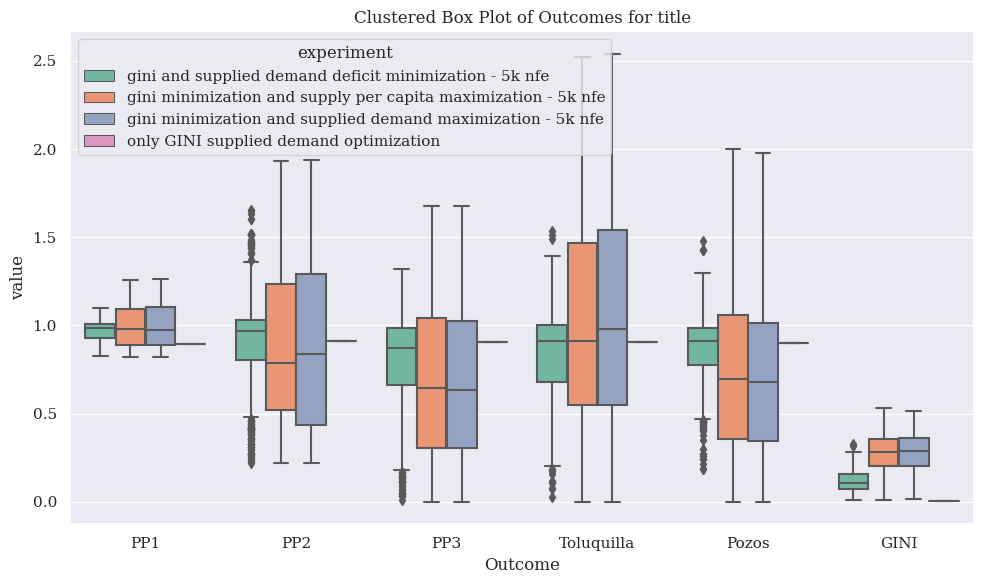

In [ ]:
from viz_functions import clustered_box_plot

clustered_box_plot(experiment_results)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

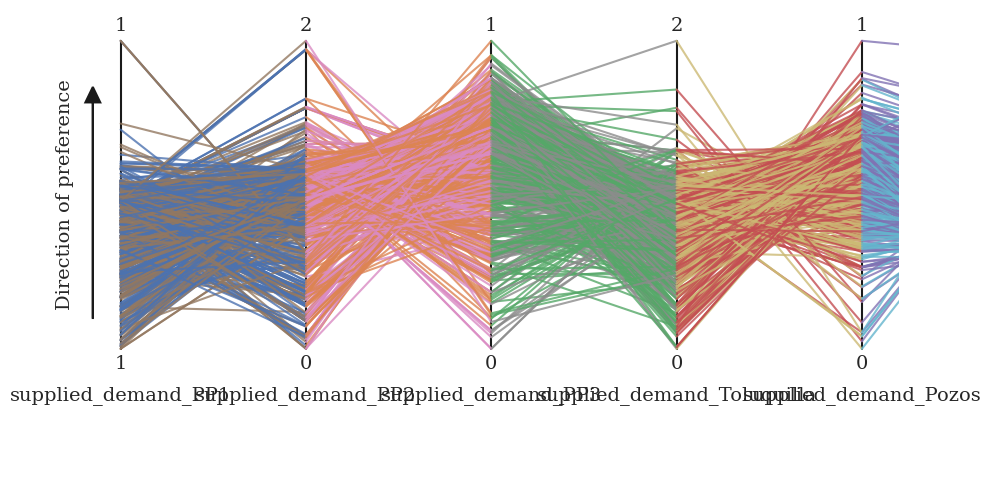

In [ ]:
### function to normalize data based on direction of preference and whether each objective is minimized or maximized
###   -> output dataframe will have values ranging from 0 (which maps to bottom of figure) to 1 (which maps to top)
def reorganize_objs(objs, columns_axes, ideal_direction, minmaxs):
    ### if min/max directions not given for each axis, assume all should be maximized
    if minmaxs is None:
        minmaxs = ['max']*len(columns_axes)
         
    ### get subset of dataframe columns that will be shown as parallel axes
    objs_reorg = objs[columns_axes]
     
    ### reorganize & normalize data to go from 0 (bottom of figure) to 1 (top of figure), 
    ### based on direction of preference for figure and individual axes
    if ideal_direction == 'bottom':
        tops = objs_reorg.min(axis=0)
        bottoms = objs_reorg.max(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, -1] = (objs_reorg.iloc[:, -1] - objs_reorg.iloc[:, -1].min(axis=0)) / \
                                         (objs_reorg.iloc[:, -1].max(axis=0) - objs_reorg.iloc[:, -1].min(axis=0))
    elif ideal_direction == 'top':
        tops = objs_reorg.max(axis=0)
        bottoms = objs_reorg.min(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i] - objs_reorg.iloc[:, i].min(axis=0)) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
 
    return objs_reorg, tops, bottoms

### function to get color based on continuous color map or categorical map
def get_color(value, color_by_continuous, color_palette_continuous, 
              color_by_categorical, color_dict_categorical):
    if color_by_continuous is not None:
        color = colormaps.get_cmap(color_palette_continuous)(value)
    elif color_by_categorical is not None:
        color = color_dict_categorical[value]
    return color

### function to get zorder value for ordering lines on plot. 
### This works by binning a given axis' values and mapping to discrete classes.
def get_zorder(norm_value, zorder_num_classes, zorder_direction):
    xgrid = np.arange(0, 1.001, 1/zorder_num_classes)
    if zorder_direction == 'ascending':
        return 4 + np.sum(norm_value > xgrid)
    elif zorder_direction == 'descending':
        return 4 + np.sum(norm_value < xgrid)

def custom_parallel_coordinates(objs, columns_axes=None, axis_labels=None, 
                                ideal_direction='top', minmaxs=None, 
                                color_by_continuous=None, color_palette_continuous=None, 
                                color_by_categorical=None, color_palette_categorical=None,
                                colorbar_ticks_continuous=None, color_dict_categorical=None,
                                zorder_by=None, zorder_num_classes=10, zorder_direction='ascending', 
                                alpha_base=0.8, brushing_dict=None, alpha_brush=0.05, 
                                lw_base=1.5, fontsize=14, 
                                figsize=(11,6), save_fig_filename=None):
     
    ### verify that all inputs take supported values
    assert ideal_direction in ['top','bottom']
    assert zorder_direction in ['ascending', 'descending']
    if minmaxs is not None:
        for minmax in minmaxs:
            assert minmax in ['max','min']
    assert color_by_continuous is None or color_by_categorical is None
    if columns_axes is None:
        columns_axes = objs.columns
    if axis_labels is None:
        axis_labels = columns_axes
     
    ### create figure
    fig,ax = plt.subplots(1,1,figsize=figsize, gridspec_kw={'hspace':0.1, 'wspace':0.1})
 
    ### reorganize & normalize objective data
    objs_reorg, tops, bottoms = reorganize_objs(objs, columns_axes, ideal_direction, minmaxs)
 
    ### apply any brushing criteria
    if brushing_dict is not None:
        satisfice = np.zeros(objs.shape[0]) == 0.
        ### iteratively apply all brushing criteria to get satisficing set of solutions
        for col_idx, (threshold, operator) in brushing_dict.items():
            if operator == '<':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] < threshold)
            elif operator == '<=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] <= threshold)
            elif operator == '>':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] > threshold)
            elif operator == '>=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] >= threshold)
 
            ### add rectangle patch to plot to represent brushing
            threshold_norm = (threshold - bottoms[col_idx]) / (tops[col_idx] - bottoms[col_idx])
            if ideal_direction == 'top' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
            elif ideal_direction == 'top' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            if ideal_direction == 'bottom' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            elif ideal_direction == 'bottom' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                     
            pc = PatchCollection([rect], facecolor='grey', alpha=0.5, zorder=3)
            ax.add_collection(pc)
     
    ### loop over all solutions/rows & plot on parallel axis plot
    for i in range(objs_reorg.shape[0]):
        if color_by_continuous is not None:
            color = get_color(objs_reorg[columns_axes[color_by_continuous]].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
        elif color_by_categorical is not None:
            color = get_color(objs[color_by_categorical].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
                         
        ### order lines according to ascending or descending values of one of the objectives?
        if zorder_by is None:
            zorder = 4
        else:
            zorder = get_zorder(objs_reorg[columns_axes[zorder_by]].iloc[i], 
                                zorder_num_classes, zorder_direction)
             
        ### apply any brushing?
        if brushing_dict is not None:
            if satisfice.iloc[i]:
                alpha = alpha_base
                lw = lw_base
            else:
                alpha = alpha_brush
                lw = 1
                zorder = 2
        else:
            alpha = alpha_base
            lw = lw_base
             
        ### loop over objective/column pairs & plot lines between parallel axes
        for j in range(objs_reorg.shape[1]-1):
            y = [objs_reorg.iloc[i, j], objs_reorg.iloc[i, j+1]]
            x = [j, j+1]
            ax.plot(x, y,  alpha=alpha, zorder=zorder, lw=lw)
             
             
    ### add top/bottom ranges
    for j in range(len(columns_axes)):
        ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', 
                    zorder=5, fontsize=fontsize)
        if j == len(columns_axes)-1:
            ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
        else:
            ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
 
        ax.plot([j,j], [0,1], c='k', zorder=1)
     
    ### other aesthetics
    ax.set_xticks([])
    ax.set_yticks([])
     
    for spine in ['top','bottom','left','right']:
        ax.spines[spine].set_visible(False)
 
    if ideal_direction == 'top':
        ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    elif ideal_direction == 'bottom':
        ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center',
                rotation=90, fontsize=fontsize)
 
    ax.set_xlim(-0.4, 4.2)
    ax.set_ylim(-0.4,1.1)
     
    for i,l in enumerate(axis_labels):
        ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
    ax.patch.set_alpha(0)
     
 
    ### colorbar for continuous legend
    if color_by_continuous is not None:
        mappable = cm.ScalarMappable(cmap=color_palette_continuous)
        mappable.set_clim(vmin=objs[columns_axes[color_by_continuous]].min(), 
                          vmax=objs[columns_axes[color_by_continuous]].max())
        cb = plt.colorbar(mappable, ax=ax, orientation='horizontal', shrink=0.4, 
                          label=axis_labels[color_by_continuous], pad=0.03, 
                          alpha=alpha_base)
        if colorbar_ticks_continuous is not None:
            _ = cb.ax.set_xticks(colorbar_ticks_continuous, colorbar_ticks_continuous, 
                                 fontsize=fontsize)
        _ = cb.ax.set_xlabel(cb.ax.get_xlabel(), fontsize=fontsize)  
    ### categorical legend
    elif color_by_categorical is not None:
        leg = []
        for label,color in color_dict_categorical.items():
            leg.append(Line2D([0], [0], color=color, lw=3, 
                              alpha=alpha_base, label=label))
        _ = ax.legend(handles=leg, loc='lower center', 
                      ncol=max(3, len(color_dict_categorical)),
                      bbox_to_anchor=[0.5,-0.07], frameon=False, fontsize=fontsize)
         
    ### save figure
    if save_fig_filename is not None:
        plt.savefig(save_fig_filename, bbox_inches='tight', dpi=300)

custom_parallel_coordinates(results_plot)

ValueError: x and y must have same first dimension, but have shapes (6,) and (735,)

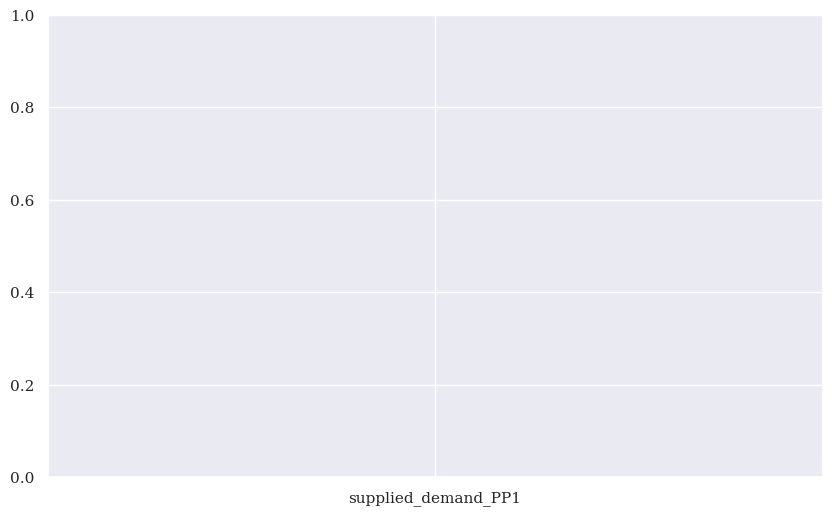

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to serif
sns.set(font='serif')

# Transpose the DataFrame so that rows become the axes and columns become the lines
viz_data_transposed = results_plot.T.reset_index(drop=True)

# Create the parallel axis plot with customized parameters
plt.figure(figsize=(10, 6))

# Get the x-axis data (column names)
x_data = results_plot.columns

# Iterate through each row (line) in the transposed dataframe
for index, row in viz_data_transposed.iterrows():
    # Plot the line
    plt.plot(x_data, row, label=index)
    
# Set plot title and labels
plt.title('Parallel Axis Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


